# Feature Importances

Produce plot of feature importances based on outputted feature importances of random forests.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows = 35
pd.options.display.max_columns = 43
%matplotlib inline

Feature names correspond to the features used during model training.

In [2]:
col_names = ['Mkt-RF_prev_month', 'RF_prev_month', 'SMB_prev_month',
       'HML_prev_month', 'SMB_prev_year', 'HML_prev_year',
       '12m_nom_gdp_forecast', '12m_ip_growth_forecast', '12m_cpi_forecast',
       '12m_real_gdp_forecast', '12m_real_ip_growth_forecast',
       '12m_unemployment_rate', 'year_of_deficit_pct_gdp', 'shiller_cape',
       'seasoned_corp_bond_yield_prev_month', 'ttm_pe_prev_month',
       'sp500_return_prev_month', 'sp500_return_prev_year',
       'termstructure_slope_chg_prev_month', 'termstructure_level_chg_prev_month',
       'business_confidence_chg_prev_month', 'ip_chg_prev_month', 'spread_chg_prev_month',
       'div_yield_chg_prev_month', '12m_nom_gdp_forecast_chg_prev_month',
       '12m_ip_growth_forecast_chg_prev_month', '12m_cpi_forecast_chg_prev_month',
       '12m_unemployment_rate_chg_prev_month']

Import feature importances from CSV

In [20]:
feat_import_hml = pd.read_csv('./Results/Feature Importance/feat_import_hml.csv')
feat_import_hml = feat_import_hml.drop(feat_import_hml.columns[0],axis=1)

feat_import_smb = pd.read_csv('./Results/Feature Importance/feat_import_smb.csv')
feat_import_smb = feat_import_smb.drop(feat_import_smb.columns[0],axis=1)

feat_import_switch = pd.read_csv('./Results/Feature Importance/feat_import_switch.csv')
feat_import_switch = feat_import_switch.drop(feat_import_switch.columns[0],axis=1)

# add feature names to columns
feat_import_hml.columns = col_names
feat_import_smb.columns = col_names
feat_import_switch.columns = col_names

In [21]:
feat_import_hml_lr = pd.read_csv('./Results/Feature Importance/Regression_L2_30yr_400window_HML.csv',index_col=0)
feat_import_smb_lr = pd.read_csv('./Results/Feature Importance/Regression_L2_30yr_400window_SMB.csv',index_col=0)
feat_import_switching_lr = pd.read_csv('./Results/Feature Importance/Regression_L2_30yr_400window_SMBHML.csv',index_col=0)


# Plot Feature Importances

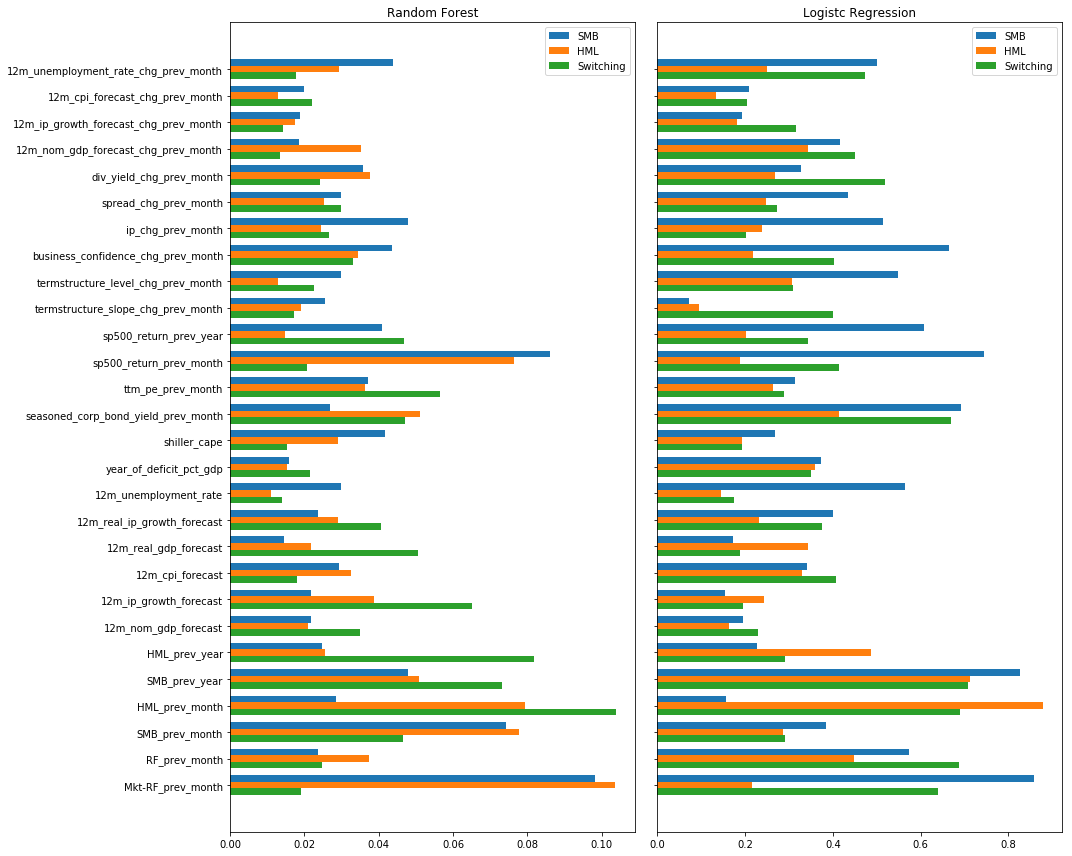

In [23]:
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,12))

indices = range(len(feat_import_smb.columns))
width = np.min(np.diff(indices))/4

ax1.barh(indices+width,feat_import_smb.mean(),width,color='C0')
ax1.barh(indices,feat_import_hml.mean(),width,color='C1')
ax1.barh(indices-width,feat_import_switch.mean(),width,color='C2')
ax1.axes.set_yticks(indices, minor=False)
ax1.axes.set_yticklabels(col_names)
ax1.legend(('SMB','HML','Switching'),loc='upper right')

ax1.set_title('Random Forest')

ax2.barh(indices+width,feat_import_smb_lr.mean(),width,color='C0')
ax2.barh(indices,feat_import_hml_lr.mean(),width,color='C1')
ax2.barh(indices-width,feat_import_switching_lr.mean(),width,color='C2')
ax2.axes.set_yticks(indices, minor=False)
ax2.axes.set_yticklabels(col_names)
ax2.legend(('SMB','HML','Switching'),loc='upper right')

ax2.set_title('Logistc Regression')

plt.tight_layout()
plt.show()

f.savefig('feature_importances',dpi=500)